In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [96]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/DataForMO/train.csv', parse_dates=['Dates'])
df_test = pd.read_csv('/content/drive/MyDrive/DataForMO/test.csv', parse_dates=['Dates'])

In [147]:
df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [97]:
df_test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [98]:
#df['Year'] = df['Dates'].map(lambda x: int(x.year))
#df['Month'] = df['Dates'].map(lambda x: x.month)
#df['Week'] = df['Dates'].map(lambda x: x.week)
df['Date'] = df['Dates'].map(lambda x: int(x.day))
df['hour'] = df['Dates'].map(lambda x: x.hour)
df['dark'] = df['Dates'].map(lambda x: 1 if (x.hour >= 18 or x.hour < 6) else 0)

In [100]:
df['Block_Ind']=df['Address'].apply(lambda x: 1 if 'block' in x.lower() else 0)
df['Street'] = df['Address'].apply(lambda x: int(x.split(" ")[0]) if x.split(" ")[0].isnumeric() else 0)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   Date        878049 non-null  int64         
 10  hour        878049 non-null  int64         
 11  dark        878049 non-null  int64         
 12  Block_Ind   878049 non-null  int64         
 13  Street      878049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 93.8+ MB


In [102]:
df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Date          0
hour          0
dark          0
Block_Ind     0
Street        0
dtype: int64

In [104]:
features_non_numeric = ['DayOfWeek','PdDistrict']

In [105]:
df_copy = df.copy()

In [106]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
category=df_copy['Category']
encoder = preprocessing.LabelEncoder()
df_copy['Category'] = encoder.fit_transform(category)

In [107]:
df.drop(['Dates','Resolution','Address','Descript'],axis=1,inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  object 
 1   DayOfWeek   878049 non-null  object 
 2   PdDistrict  878049 non-null  object 
 3   X           878049 non-null  float64
 4   Y           878049 non-null  float64
 5   Date        878049 non-null  int64  
 6   hour        878049 non-null  int64  
 7   dark        878049 non-null  int64  
 8   Block_Ind   878049 non-null  int64  
 9   Street      878049 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 67.0+ MB


In [109]:
le = LabelEncoder()
for col in features_non_numeric:
    df[col] = le.fit_transform(df[col])


df.drop(['Category'], axis=1,inplace=True)
new_train = df.copy()

In [110]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DayOfWeek   878049 non-null  int64  
 1   PdDistrict  878049 non-null  int64  
 2   X           878049 non-null  float64
 3   Y           878049 non-null  float64
 4   Date        878049 non-null  int64  
 5   hour        878049 non-null  int64  
 6   dark        878049 non-null  int64  
 7   Block_Ind   878049 non-null  int64  
 8   Street      878049 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 60.3 MB


In [112]:
new_train.head()
mean = new_train.mean(axis=0)
std = new_train.std(axis=0)
new_train -= mean
new_train /= std
new_train

,DayOfWeek,PdDistrict,X,Y,Date,hour,dark,Block_Ind,Street
0,1.485498,-0.155501,-0.107902,0.007832,-0.292681,1.463812,1.075852,-1.538349,-0.702876
1,1.485498,-0.155501,-0.107902,0.007832,-0.292681,1.463812,1.075852,-1.538349,-0.702876
2,1.485498,-0.155501,-0.057541,0.064335,-0.292681,1.463812,1.075852,-1.538349,-0.702876
3,1.485498,-0.155501,-0.144262,0.065338,-0.292681,1.463812,1.075852,0.650047,0.794598
4,1.485498,0.193696,-0.531112,0.001140,-0.292681,1.463812,1.075852,0.650047,-0.603045
...,...,...,...,...,...,...,...,...,...
878044,-0.982295,1.241286,-1.199746,-0.124677,-1.089675,-2.047867,1.075852,-1.538349,-0.702876
878045,-0.982295,-0.853894,-0.815292,-0.085518,-1.089675,-2.047867,1.075852,0.650047,-0.103887
878046,-0.982295,0.892089,0.633403,0.020235,-1.089675,-2.047867,1.075852,-1.538349,-0.702876
878047,-0.982295,0.892089,1.057042,0.020983,-1.089675,-2.047867,1.075852,-1.538349,-0.702876


In [113]:
y = df_copy["Category"]

In [114]:
y

0         37
1         21
2         21
3         16
4         16
          ..
878044    25
878045    16
878046    16
878047    35
878048    12
Name: Category, Length: 878049, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.33)#, random_state=42)

In [116]:
from sklearn.linear_model import LassoCV

In [139]:
alphas = np.linspace(0.1, 100, 2000)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=17)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([  0.1       ,   0.14997499,   0.19994997, ...,  99.90005003,
        99.95002501, 100.        ]),
        cv=5, random_state=17)

In [119]:
lasso_cv.alpha_

0.1

In [120]:
lasso_cv.coef_

array([ 0.        , -0.42429047, -0.37914971,  0.10287297,  0.        ,
        0.10070534,  0.15826364, -0.53372119, -0.09155125])

In [121]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.008172118428868447

In [123]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [124]:
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
pred_lasso = lasso.predict(X_test)
r2_score(y_test, pred_lasso)

0.007810252179759503

In [127]:
lasso.score(X_test,y_test)

0.007810252179759503

In [128]:
tree = DecisionTreeClassifier(max_depth = 5, max_features=5)

In [129]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

score = round(accuracy_score(y_test, y_pred)*100,2)
print("Точность: "+str(score)+" %")

Точность: 23.3 %


In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [132]:
knc = KNeighborsClassifier(n_neighbors=1)

In [133]:
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

In [134]:
score = round(accuracy_score(y_test, y_pred)*100, 6)
print("Точность: " + str(score) + " %")

Точность: 20.462318 %


In [135]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, n_estimators = 256)
rf.fit(X_train.values, y_train.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=256)

In [136]:
y_pred = rf.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [141]:
print ("Точность тренировочных данных: ", accuracy_score(y_train, rf.predict(X_train)))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Точность тренировочных данных:  0.2722831519041564


In [140]:
print ("Точность тестовых данных: ", accuracy_score(y_test, y_pred))

Точность тестовых данных:  0.267789906714937


Тестовое обучение

In [156]:
df.drop(['Descript','Resolution','Dates'],axis=1, inplace=True)

In [157]:
import matplotlib.pyplot as plt

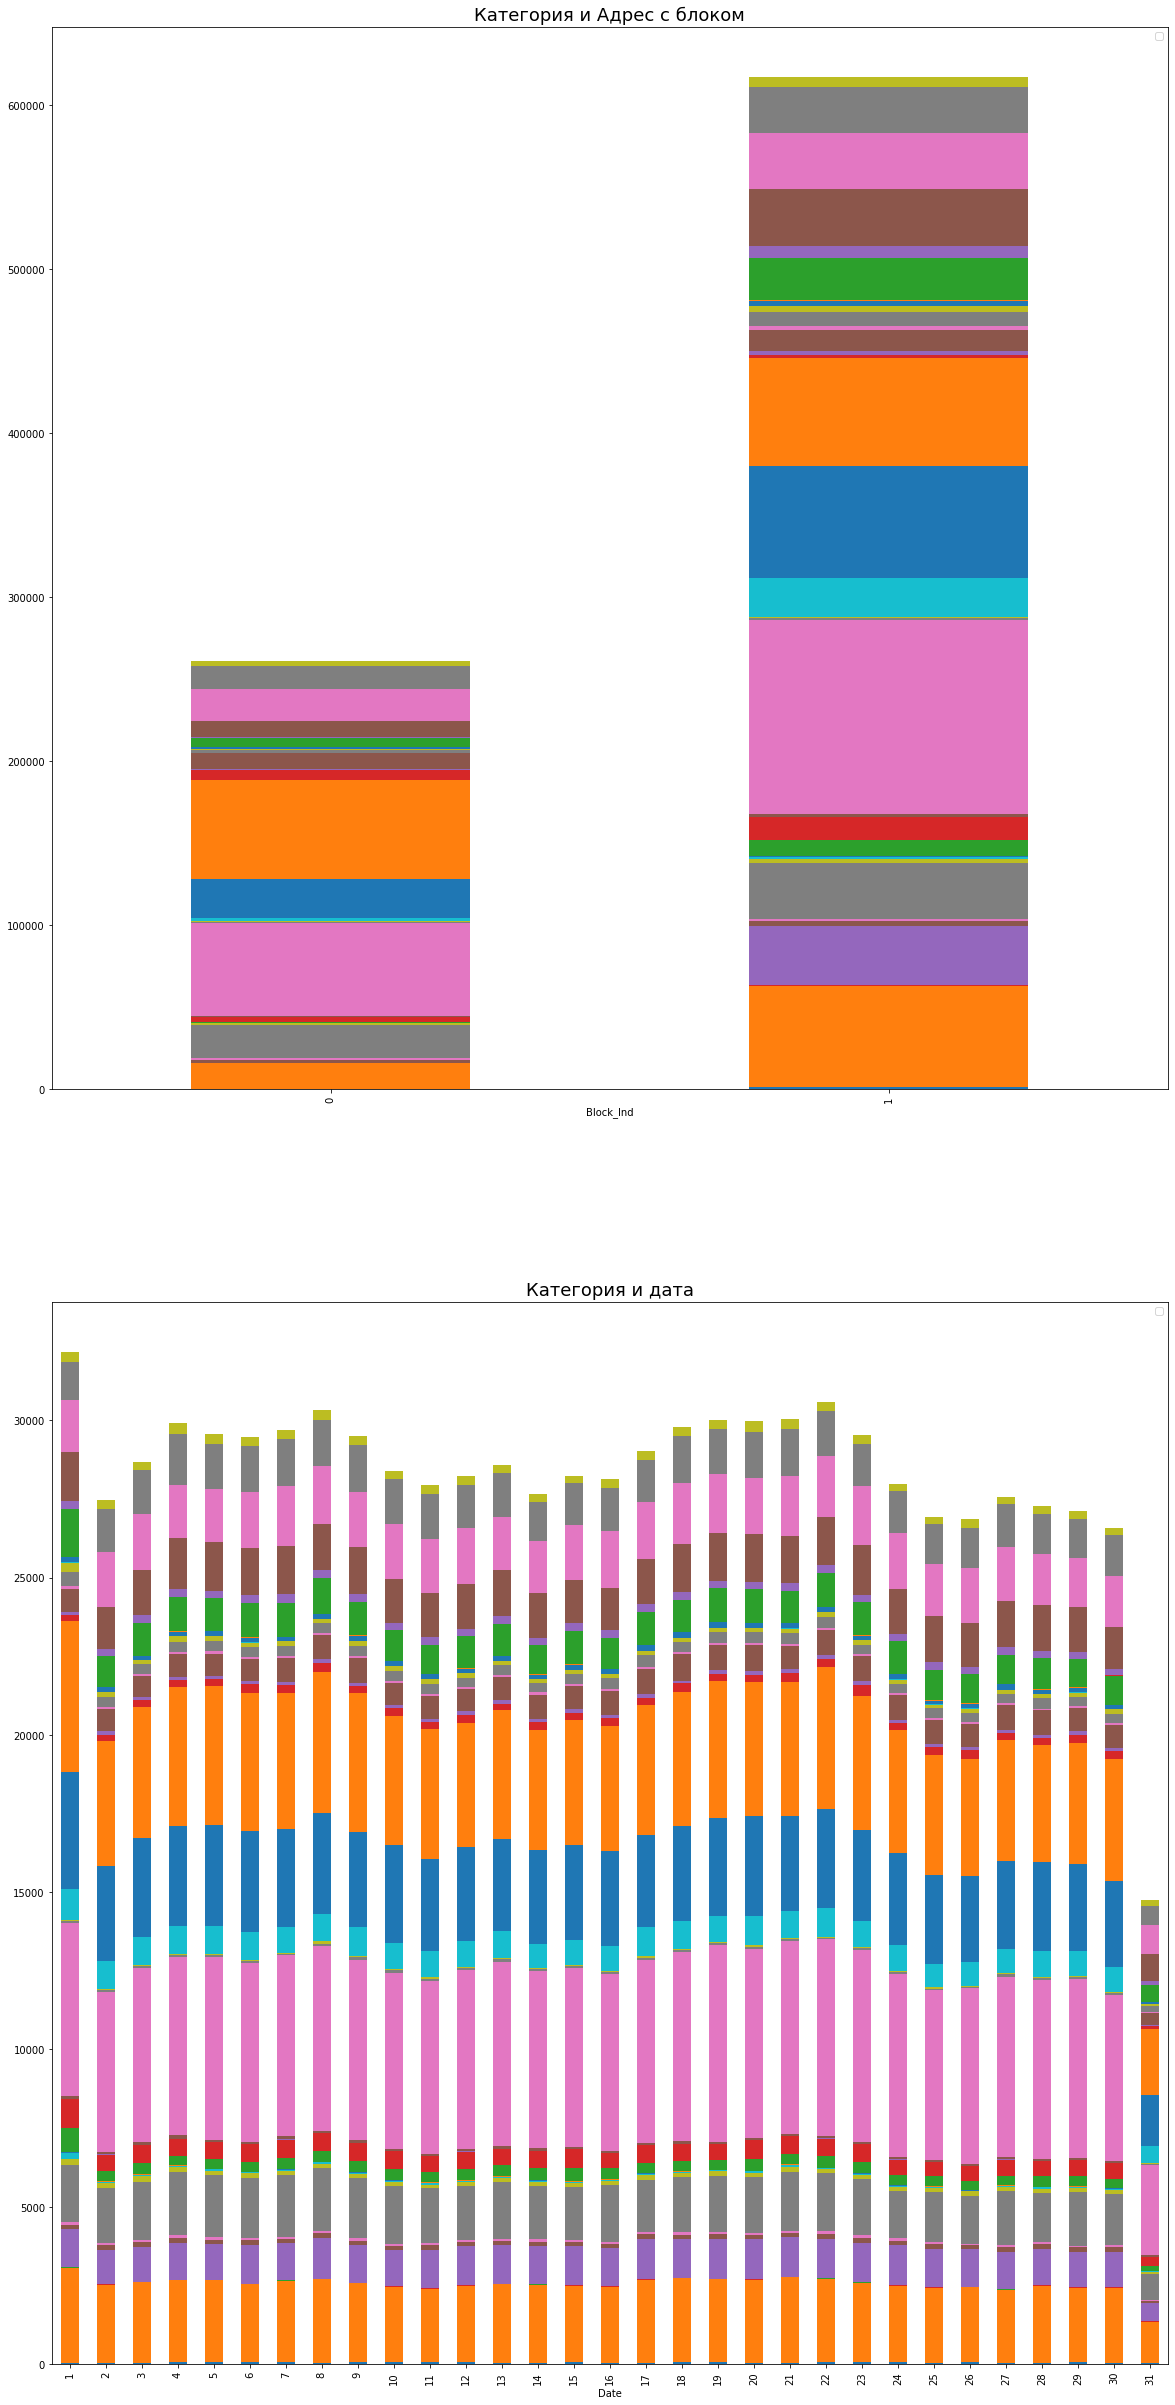

In [159]:
fig, ax= plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(20, 43)
tmp=pd.crosstab(df.Block_Ind, df.Category).plot.bar(stacked=True, ax=ax[0])
ax[0].legend([])
ax[0].set_title("Категория и Адрес с блоком", size=18)
tmp=pd.crosstab(df.Date, df.Category).plot.bar(stacked=True, ax=ax[1])
ax[1].legend([])
ax[1].set_title("Категория и дата", size=18)
plt.show()

In [162]:
df.drop(['Address'],axis=1, inplace=True)

KeyError: ignored

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  object 
 1   DayOfWeek   878049 non-null  object 
 2   PdDistrict  878049 non-null  object 
 3   X           878049 non-null  float64
 4   Y           878049 non-null  float64
 5   Year        878049 non-null  int64  
 6   Month       878049 non-null  int64  
 7   Week        878049 non-null  int64  
 8   Date        878049 non-null  int64  
 9   Hour        878049 non-null  int64  
 10  Block_Ind   878049 non-null  int64  
 11  Street      878049 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 80.4+ MB


In [163]:
df_copy = df.copy()

In [164]:
categorial_features = df.select_dtypes(include=["object"]).columns
train_enc = df[categorial_features].fillna("None")
train_enc.head()

,Category,DayOfWeek,PdDistrict
0,WARRANTS,Wednesday,NORTHERN
1,OTHER OFFENSES,Wednesday,NORTHERN
2,OTHER OFFENSES,Wednesday,NORTHERN
3,LARCENY/THEFT,Wednesday,NORTHERN
4,LARCENY/THEFT,Wednesday,PARK


In [165]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
category=df_copy['Category']
encoder = preprocessing.LabelEncoder()
df_copy['Category'] = encoder.fit_transform(category)

In [166]:
df

,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Week,Date,Hour,Block_Ind,Street
0,WARRANTS,Wednesday,NORTHERN,0.087750,0.066720,2015,5,20,13,23,0,0
1,OTHER OFFENSES,Wednesday,NORTHERN,0.087750,0.066720,2015,5,20,13,23,0,0
2,OTHER OFFENSES,Wednesday,NORTHERN,0.089279,0.092535,2015,5,20,13,23,0,0
3,LARCENY/THEFT,Wednesday,NORTHERN,0.086647,0.092994,2015,5,20,13,23,1,1500
4,LARCENY/THEFT,Wednesday,PARK,0.074904,0.063662,2015,5,20,13,23,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,Monday,TARAVAL,0.054609,0.006177,2003,1,2,6,0,0,0
878045,LARCENY/THEFT,Monday,INGLESIDE,0.066279,0.024069,2003,1,2,6,0,1,600
878046,LARCENY/THEFT,Monday,SOUTHERN,0.110252,0.072387,2003,1,2,6,0,0,0
878047,VANDALISM,Monday,SOUTHERN,0.123111,0.072728,2003,1,2,6,0,0,0


In [167]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
encoder.fit(train_enc[categorial_features])
train_enc[categorial_features] = encoder.transform(train_enc[categorial_features])
train_enc

,Category,DayOfWeek,PdDistrict
0,37.0,6.0,4.0
1,21.0,6.0,4.0
2,21.0,6.0,4.0
3,16.0,6.0,4.0
4,16.0,6.0,5.0
...,...,...,...
878044,25.0,1.0,8.0
878045,16.0,1.0,2.0
878046,16.0,1.0,7.0
878047,35.0,1.0,7.0


In [170]:
train_enc.drop(['Category'],axis=1, inplace=True)

In [171]:
train_enc

,DayOfWeek,PdDistrict
0,6.0,4.0
1,6.0,4.0
2,6.0,4.0
3,6.0,4.0
4,6.0,5.0
...,...,...
878044,1.0,8.0
878045,1.0,2.0
878046,1.0,7.0
878047,1.0,7.0


In [172]:
numbers = df.drop(['DayOfWeek', 'PdDistrict','Category'], axis=1)
numbers.head()

,X,Y,Year,Month,Week,Date,Hour,Block_Ind,Street
0,0.087750,0.066720,2015,5,20,13,23,0,0
1,0.087750,0.066720,2015,5,20,13,23,0,0
2,0.089279,0.092535,2015,5,20,13,23,0,0
3,0.086647,0.092994,2015,5,20,13,23,1,1500
4,0.074904,0.063662,2015,5,20,13,23,1,100


In [173]:
new_train = numbers.join(train_enc)
new_train

,X,Y,Year,Month,Week,Date,Hour,Block_Ind,Street,DayOfWeek,PdDistrict
0,0.087750,0.066720,2015,5,20,13,23,0,0,6.0,4.0
1,0.087750,0.066720,2015,5,20,13,23,0,0,6.0,4.0
2,0.089279,0.092535,2015,5,20,13,23,0,0,6.0,4.0
3,0.086647,0.092994,2015,5,20,13,23,1,1500,6.0,4.0
4,0.074904,0.063662,2015,5,20,13,23,1,100,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
878044,0.054609,0.006177,2003,1,2,6,0,0,0,1.0,8.0
878045,0.066279,0.024069,2003,1,2,6,0,1,600,1.0,2.0
878046,0.110252,0.072387,2003,1,2,6,0,0,0,1.0,7.0
878047,0.123111,0.072728,2003,1,2,6,0,0,0,1.0,7.0


In [174]:
y = df_copy["Category"]

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.20, random_state=42)

In [187]:
X_train

,X,Y,Year,Month,Week,Date,Hour,Block_Ind,Street,DayOfWeek,PdDistrict
81381,0.093970,0.057171,2014,4,16,16,6,0,0,6.0,3.0
238545,0.104811,0.042510,2012,2,8,26,10,1,2700,3.0,3.0
823641,0.038106,0.048274,2003,9,38,20,19,0,0,2.0,8.0
497355,0.098134,0.073775,2008,5,20,13,13,0,0,5.0,9.0
484193,0.100672,0.077909,2008,7,30,21,18,0,0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
259178,0.107747,0.078855,2011,11,46,14,17,1,0,1.0,9.0
365838,0.116883,0.065294,2010,4,14,9,22,1,300,0.0,7.0
131932,0.086686,0.061368,2013,8,32,10,22,1,2000,2.0,3.0
671155,0.126700,0.046289,2005,11,44,4,5,0,0,0.0,0.0


In [188]:
y_train

81381     20
238545    20
823641    36
497355     1
484193     7
          ..
259178    16
365838    27
131932    16
671155    21
121958    16
Name: Category, Length: 702439, dtype: int64

In [179]:
lasso_cv.alpha_

0.1

In [180]:
lasso_cv.coef_

array([-0.00000000e+00, -0.00000000e+00, -5.09421126e-02, -0.00000000e+00,
       -1.97832922e-04, -0.00000000e+00,  3.26951084e-02, -7.56812454e-01,
       -2.04726212e-04, -0.00000000e+00, -1.43365924e-01])

In [181]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.005899515355117679

In [182]:
from sklearn.metrics import mean_squared_error, r2_score

In [183]:
pred_lasso = lasso.predict(X_test)
r2_score(y_test, pred_lasso)

0.005830934439164048

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
rf = RandomForestRegressor(n_estimators=10)